![](health_ins_pic.jpeg)

# **Part One: Data Exploration**

The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:

Age of primary beneficiary

Gender of primary beneficiary (only female, male recorded)

Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

Whether the beneficiary smokes

The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

Individual medical costs billed by health insurance

You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

*    Read in the dataset, and display some summaries of the data.

*    Fix any concerns you have about the data.

*    Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

In [44]:
# Reading in the data
import pandas as pd
import numpy as np

ins_costs = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
ins_costs.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [45]:
# Checking the number of rows and columns
ins_costs.shape

(431, 6)

In [46]:
# Displaying summary statistics
ins_costs.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [47]:
# Checking for NA
ins_costs.isna().sum()

age        0
sex        0
bmi        0
smoker     0
region     0
charges    0
dtype: int64

*Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.*

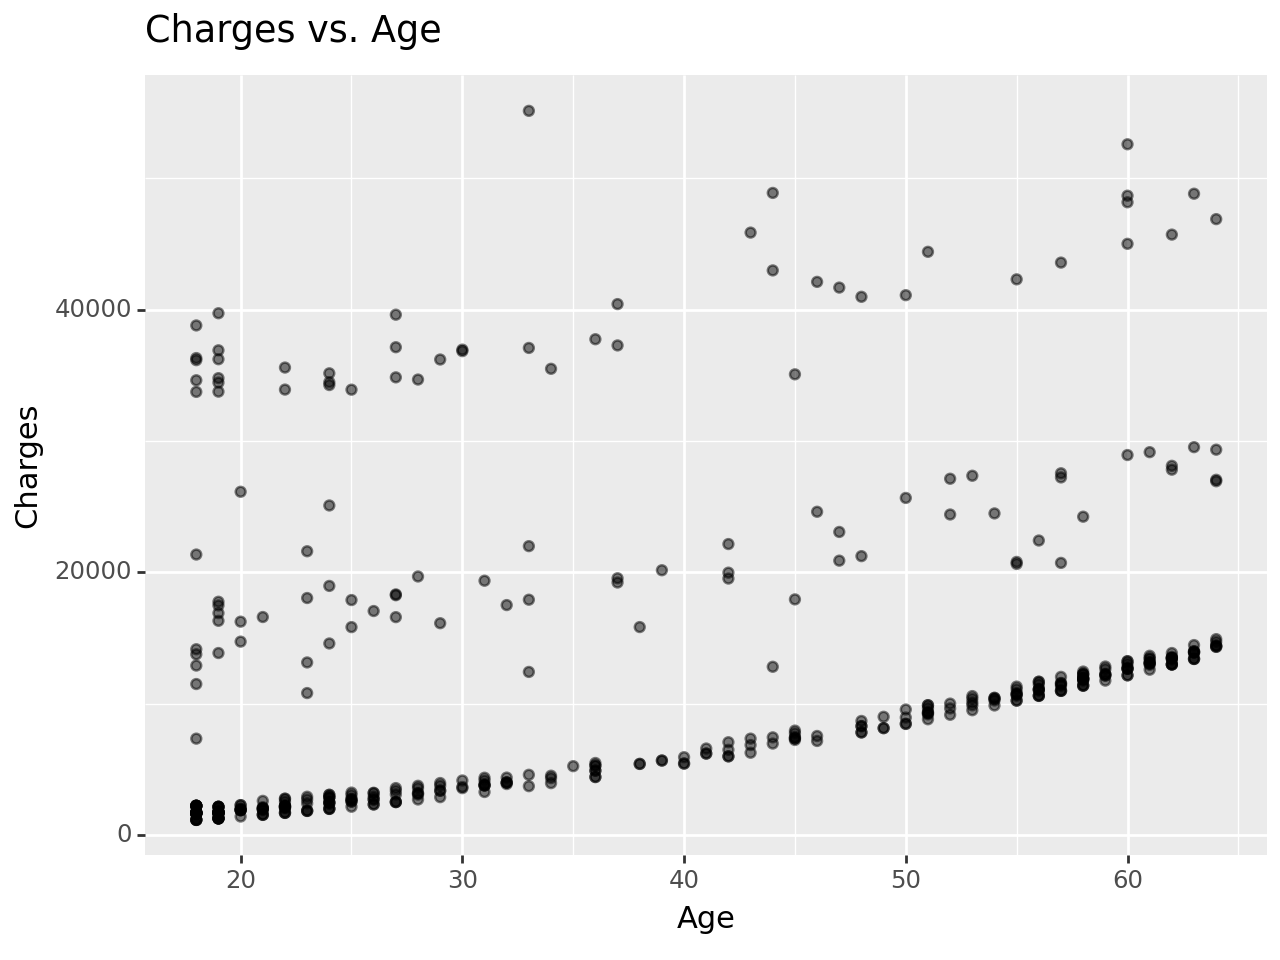

In [48]:
# Plot 1: Scatterplot of charges vs age
from plotnine import ggplot, aes, geom_point, labs, geom_boxplot

plot = (
    ggplot(ins_costs, aes(x='age', y='charges')) +
    geom_point(alpha=0.5) +
    labs(title="Charges vs. Age", x="Age", y="Charges")
)

print(plot)

*    Insurance charges tend to increase as people age, but there are instances of higher charges at younger ages as well, possibly having to do with smoking or having a high BMI.

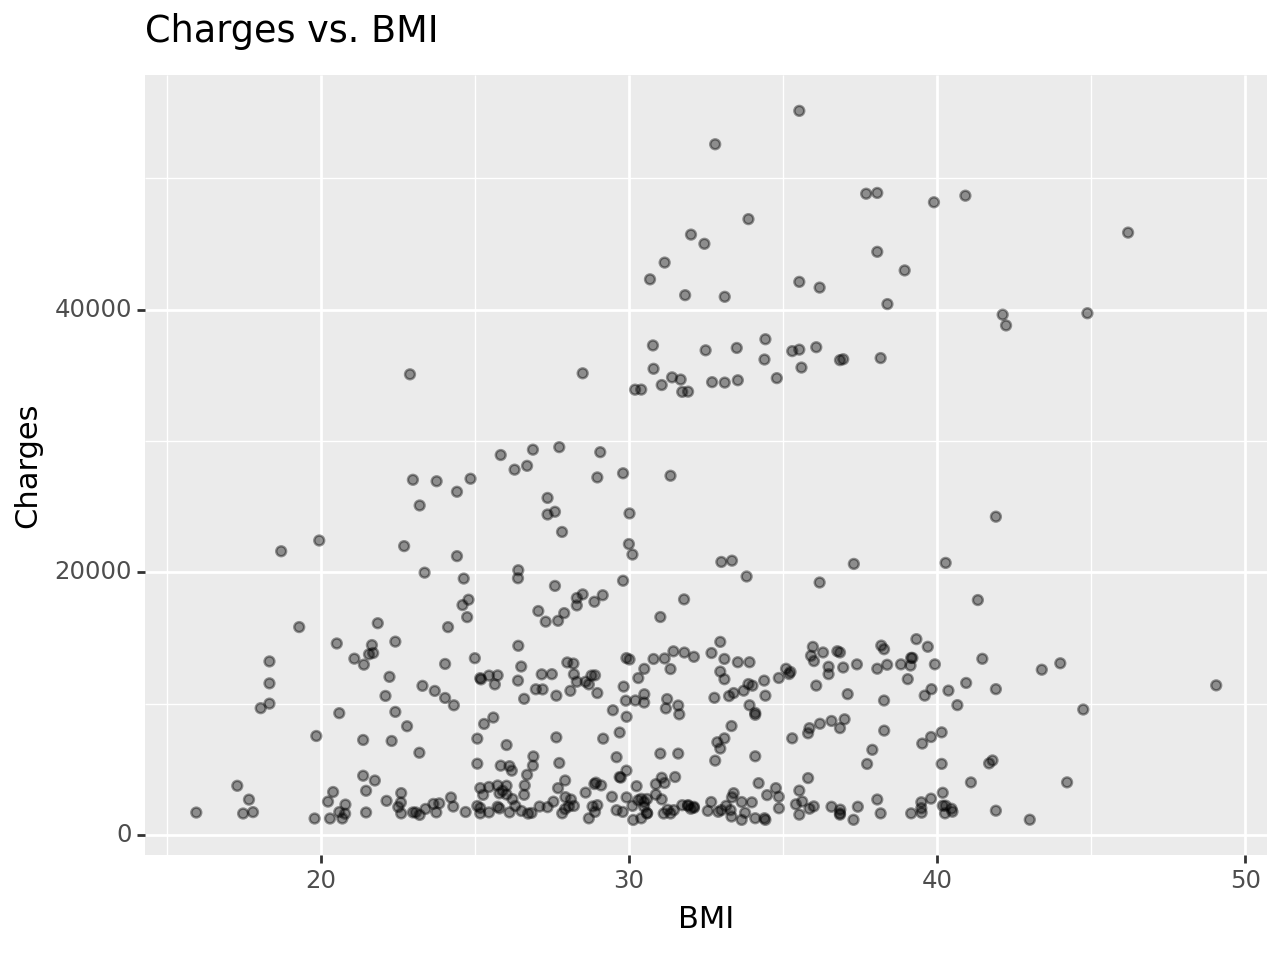

In [49]:
# Plot2: Scatterplot of charges vs BMI
plot = (
    ggplot(ins_costs, aes(x='bmi', y='charges')) +
    geom_point(alpha=0.4) +
    labs(title="Charges vs. BMI", x="BMI", y="Charges")
)

print(plot)

*    The plot shows that there are not many healthy BMI data points between 18.5 and 24.9 as there are overweight and obese levels of BMI. There seems to be a positive correlation between BMI and insurance charges, especially when BMI is 30+ which indicates obese body weight.

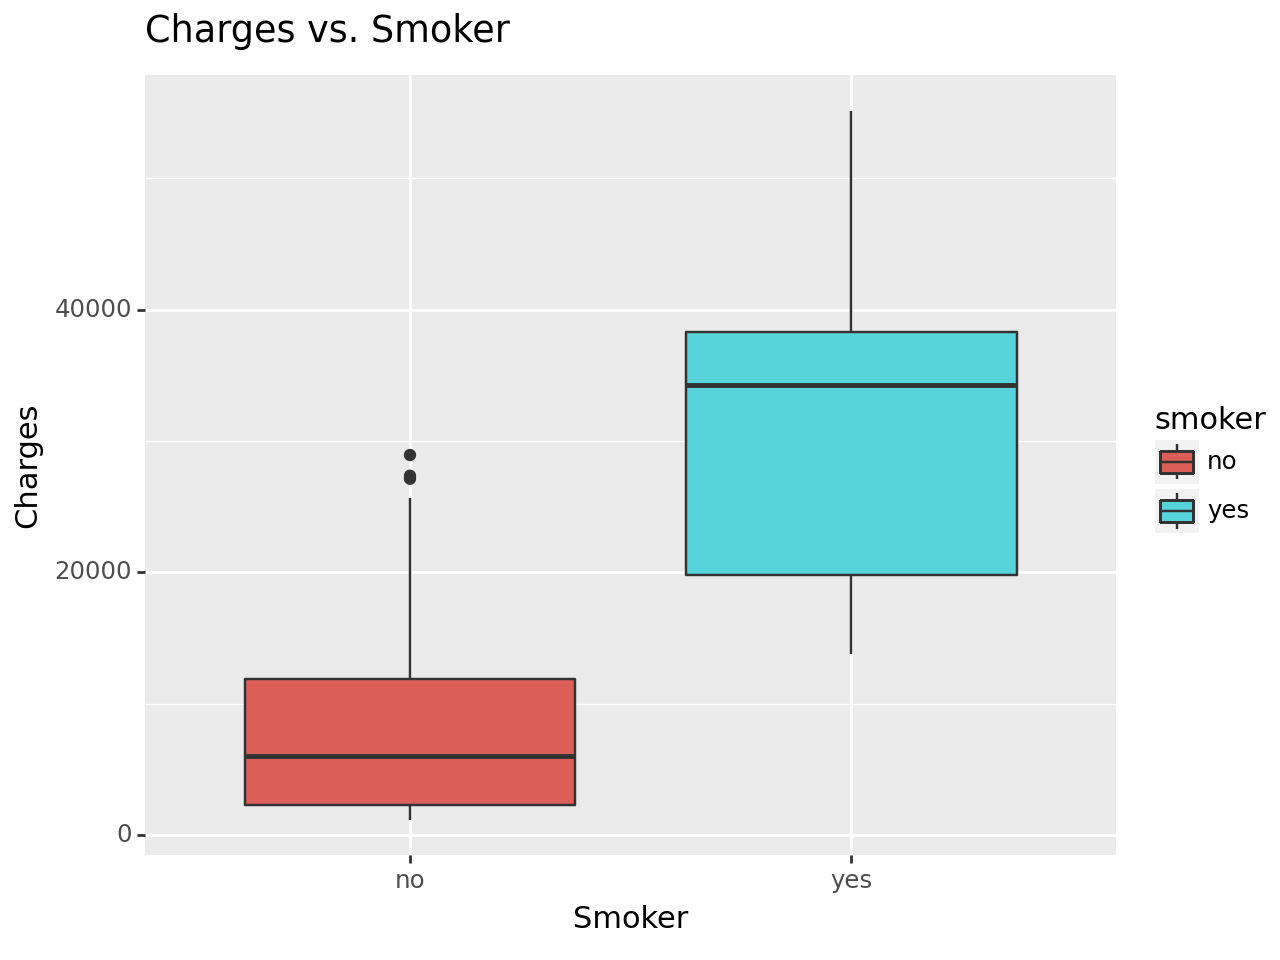

In [50]:
# Plot3: Boxplot of charges vs smoker
plot = (
    ggplot(ins_costs, aes(x='smoker', y='charges')) +
    geom_boxplot(aes(fill='smoker')) +
    labs(title="Charges vs. Smoker", x="Smoker", y="Charges")
)

print(plot)

*    Insurance charges are significantly higher for smokers than they are for non-smokers as presented by this boxplot.

# **Part Two: Simple Linear Models**

*1. Construct a simple linear model to predict the insurance charges from the beneficiary's age. Discuss the model fit, and interpret the coefficient estimates.*

In [ ]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
# Defining the response and predictor variables
X = ins_costs[['age']]
y = ins_costs['charges']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # why 42? because it's the answer to life, & everything

# Fitting the model on the training data
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

# Predicting on the test data
y_pred_test_1 = lr1.predict(X_test)
mse_test_1 = mean_squared_error(y_test, y_pred_test_1)
r2_test_1 = r2_score(y_test, y_pred_test_1)

In [73]:
# Performance for the model based on age only
print(f"Test MSE for Model 1: {mse_test_1:.2f}")
print(f"Test R-squared for Model 1: {r2_test_1:.2f}")
print(f"y-int: {lr1.intercept_:.2f}")
print(f"Coeff [age]: {lr1.coef_[0]:.2f}")

Test MSE for Model 1: 121801716.16
Test R-squared for Model 1: 0.14
y-int: 4393.70
Coeff [age]: 211.69


*    The R-squared score of 0.14 indicates that only 14% of the variability is explained by the model. This would suggest that only using age as a predictor variable is probably not enough to estimate a reliable model.

*    The y-intercept value indicates that at age 0, there would be an estimated insurance charge of $4,393.70.

*    The coefficient for the age variable indicates that with every 1 unit of change in age, there is a $211.69 change in insurance costs, holding all else constant.

*2. Make a model that also incorporates the variable sex. Report your results.*



In [58]:
# Creating dummy variables and creating a reference variable for each
ins_costs_dummies = pd.get_dummies(ins_costs, drop_first=True)
ins_costs_dummies.head()

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,1,0,0,1
1,33,22.705,21984.47061,1,0,1,0,0
2,32,28.880,3866.85520,1,0,1,0,0
3,31,25.740,3756.62160,0,0,0,1,0
4,60,25.840,28923.13692,0,0,1,0,0


In [62]:
# Defining the response and predictor variables
X = ins_costs_dummies[['age', 'sex_male']]
y = ins_costs_dummies['charges']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fitting the model on the training data
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

# Predicting and evaluating on the test data
y_pred_test_2 = lr2.predict(X_test)
mse_test_2 = mean_squared_error(y_test, y_pred_test_2)
r2_test_2 = r2_score(y_test, y_pred_test_2)

In [74]:
# Performance for the model based on age and sex
print(f"Test MSE for Model 2: {mse_test_2:.2f}")
print(f"Test R-squared for Model 2: {r2_test_2:.2f}")
print(f"y-int: {lr2.intercept_:.2f}")
print(f"Coeff [age]: {lr2.coef_[0]:.2f}")
print(f"Coeff [sex_male]: {lr2.coef_[1]:.2f}")

Test MSE for Model 2: 144189669.48
Test R-squared for Model 2: 0.11
y-int: 3298.21
Coeff [age]: 213.46
Coeff [sex_male]: 1604.48


*     This model that incorporates the age and sex variable has an r-squared value of 0.11, which indicates that only 11% of the variability is explained by the model. This performed worse than just age alone, and this could mean that incorporating other variables such as bmi, smoker, and/or region could better fit the model than age and sex.

*     The y-intercept value indicates that at age 0, there is an estimated charge of $3298.21.

*    The coefficient for age is 213.46, which indicates that with 1 unit change in age, holding all else constant, there would be a $213.46 change in insurance charges.

*     The coefficient for sex_male is 1604.48, which would indicate that being male is associated with an increase in insurance charges by $1604.48, holding all else constant.


*3. Now make a model that does not include sex, but does include smoker. Report your results.*

In [133]:
# Defining the response and predictor variables
X = ins_costs_dummies[['age', 'smoker_yes']]
y = ins_costs_dummies['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the model on the training data
lr3 = LinearRegression()
lr3.fit(X_train, y_train)

# Predict and evaluate on the test data
y_pred_test_3 = lr3.predict(X_test)
mse_test_3 = mean_squared_error(y_test, y_pred_test_3)
r2_test_3 = r2_score(y_test, y_pred_test_3)

In [134]:
# Print out the performance for the model based on age and smoker status
print(f"Test MSE for Model 3: {mse_test_3:.2f}")
print(f"Test R-squared for Model 3: {r2_test_3:.2f}")
print(f"y-int: {lr3.intercept_:.2f}")
print(f"Coeff [Age]: {lr3.coef_[0]:.2f}")
print(f"Coeff [Smoker_Yes]: {lr3.coef_[1]:.2f}")

Test MSE for Model 3: 27352787.78
Test R-squared for Model 3: 0.81
y-int: -1924.82
Coeff [Age]: 247.97
Coeff [Smoker_Yes]: 23783.24


*   This model with age and smoker predicting charges had an R2 score of 0.81, which indicates that 81% of the variability is represented by the model. This is considerably more than the previous models, so we can determine that smoking along with age has a considerable effect on insurance charges, more so than age and sex.

*    The y-intercept is -1924.82 which indicates that at age 0 and non-smoking, there is a charge of -$1924.82, but like previous models, the y-intercept does not have meaning as someone with age 0 would not typically have hospital charges.

*    The coefficient for age is 247.97 which indicates that for every 1 unit change in age, holding all other variables constant, there is a $247.97 change in insurance charges.

*    The coefficient for being a smoker is 23783.24 and this indicates that being a smoker results in a increase in insurance charge by $23783.24.

*4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.*

In [135]:
# Comparing the models based on test MSE and R-squared
print("Comparison of Model 2 and 3 based on Test Data:")
print(f"Test MSE for Model 2: {mse_test_2:.2f} vs Model 3: {mse_test_3:.2f}")
print(f"Test R-squared for Model 2: {r2_test_2:.2f} vs Model 3: {r2_test_3:.2f}")
print()
print("Model 1 results:")
print(f"Test MSE for Model 1: {mse_test_1:.2f}")
print(f"Test R-squared for Model 1: {r2_test_1:.2f}")

Comparison of Model 2 and 3 based on Test Data:
Test MSE for Model 2: 144189669.48 vs Model 3: 27352787.78
Test R-squared for Model 2: 0.11 vs Model 3: 0.81

Model 1 results:
Test MSE for Model 1: 121801716.16
Test R-squared for Model 1: 0.14


*    Between Model 3 and Model 2, Model 3's R-squared score (0.81) is considerably higher than Model 2 (0.11) and also Model 1 (0.14). When comparing Model 1 to Model 2, only the sex variable was added and the model actually got worse.

*    Between Model 2 (144,189,669.48) and Model 3 (27,352,787.78), removing the sex variable and adding in the smoker variable improved the MSE score dramatically.

*    Model 3 fits the data better than the Model 2, and Model 1.

# **Part Three: Multiple Linear Models**

Now let’s consider including multiple quantitative predictors.



*1. Fit a model that uses age and bmi as predictors.* \(Do not include an interaction term, age\*bmi, between these two.) *Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?*

In [77]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [90]:
# Splitting the data into training and test sets
X = ins_costs_dummies[['age', 'bmi']]
y = ins_costs_dummies['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
# Initialize a dictionary to store model performance
model_performance = {}

In [92]:
# Model 4: Age and BMI
lr4 = LinearRegression()
lr4.fit(X_train, y_train)
y_pred4 = lr4.predict(X_test)
mse_4 = mean_squared_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)
model_performance['Model 4: Age, BMI'] = {'MSE': mse_4, 'R2': r2_4}

In [102]:
# Defining P2_Q1's Performance Metrics
p2_q1_r2 = 0.14
p2_q1_mse = 121801716.16
p2_q1_rmse = np.sqrt(p2_q1_mse)
model_performance['Model 1: Age'] = {'MSE': mse_test_1, 'R2': r2_test_1}

# Calculating MSE and RMSE for Model 4
mse_4 = mean_squared_error(y_test, y_pred4)
rmse_4 = np.sqrt(mse_4)

# Printing out the performance for Model 4
print(f"R2 for Model 4: {r2_4:.2f} (P2_Q1 R2: {p2_q1_r2:.2f})")
print(f"Mean Squared Error for Model 4: {mse_4:.2f} (P2_Q1 MSE: {p2_q1_mse:.2f})")
print(f"Root Mean Squared Error for Model 4: {rmse_4:.2f} (P2_Q1 RMSE: {p2_q1_rmse:.2f})")

R2 for Model 4: 0.17 (P2_Q1 R2: 0.14)
Mean Squared Error for Model 4: 117716955.13 (P2_Q1 MSE: 121801716.16)
Root Mean Squared Error for Model 4: 10849.74 (P2_Q1 RMSE: 11036.38)


*    Model 4 with predictor variables age and bmi, without an interaction term between them, had a MSE of 117716955.13, which was slightly better at explaining the variability in the model than P2_Q1's Model 1 at 121801716.16. The R2 score tells the same story; Model 4, 0.17, was slightly better than Model 1, 0.14.

*2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?*

In [94]:
# Model 5: Age and Age Squared
X_train_5 = X_train.copy()
X_train_5['age_squared'] = X_train_5['age'] ** 2
X_test_5 = X_test.copy()
X_test_5['age_squared'] = X_test_5['age'] ** 2

lr5 = LinearRegression()
lr5.fit(X_train_5, y_train)
y_pred5 = lr5.predict(X_test_5)
mse_5 = mean_squared_error(y_test, y_pred5)
r2_5 = r2_score(y_test, y_pred5)
model_performance['Model 5: Age, Age Squared'] = {'MSE': mse_5, 'R2': r2_5}

In [95]:
# Calculating MSE and RMSE for model 5
mse_5 = mean_squared_error(y_test, y_pred5)
rmse_5 = np.sqrt(mse_5)

print(f"R2 for Model 5: {r2_5:.2f} (P2_Q1 R2: {p2_q1_r2:.2f})")
print(f"Mean Squared Error for Model 5: {mse_5:.2f} (P2_Q1 MSE: {p2_q1_mse:.2f})")
print(f"Root Mean Squared Error for Model 5: {rmse_5:.2f} (P2_Q1 RMSE: {p2_q1_rmse:.2f})")

R2 for Model 5: 0.17 (P2_Q1 R2: 0.14)
Mean Squared Error for Model 5: 117672740.52 (P2_Q1 MSE: 121801716.16)
Root Mean Squared Error for Model 5: 10847.71 (P2_Q1 RMSE: 11036.38)


*    Model 5 with predictor variables age and age^2 had a MSE of 117,672,740.52, which was only slightly better at explaining the variability than Model 1 at 121,801,716.16, and ever so slightly better than Model 4 at 117,716,955.13. The R2 score tells the same story; Model 5's R2 of 0.17 was better than Model 1's R2 of 0.14 from Part Two Q1, but was the same as Model 4's R2 score above.

*3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?*

In [96]:
# Model 6: Polynomial Degree 4
poly4 = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly4 = poly4.fit_transform(X_train[['age']])
X_test_poly4 = poly4.transform(X_test[['age']])
lr6 = LinearRegression()
lr6.fit(X_train_poly4, y_train)
y_pred6 = lr6.predict(X_test_poly4)
mse_6 = mean_squared_error(y_test, y_pred6)
r2_6 = r2_score(y_test, y_pred6)
model_performance['Model 6: Polynomial Degree 4'] = {'MSE': mse_6, 'R2': r2_6}

In [97]:
# Calculating MSE and RMSE for model 6
mse_6 = mean_squared_error(y_test, y_pred6)
rmse_6 = np.sqrt(mse_6)

print(f"R2 for Model 6: {r2_6:.2f} (P2_Q1 R2: {p2_q1_r2:.2f})")
print(f"Mean Squared Error for Model 6: {mse_6:.2f} (P2_Q1 MSE: {p2_q1_mse:.2f})")
print(f"Root Mean Squared Error for Model 6: {rmse_6:.2f} (P2_Q1 RMSE: {p2_q1_rmse:.2f})")

R2 for Model 6: 0.15 (P2_Q1 R2: 0.14)
Mean Squared Error for Model 6: 119880218.41 (P2_Q1 MSE: 121801716.16)
Root Mean Squared Error for Model 6: 10948.98 (P2_Q1 RMSE: 11036.38)


*    Model 6 with predictor variables age, age^2, age^3, and age^4 had a MSE of 119,880,218.41, and R2 score of 0.15, which was slightly better at explaining the variability than P2 Q1's Model 1 at MSE of 119,880,218.41 and R2 of 0.14.

*4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?*

In [99]:
# Model 7: Polynomial Degree 12
poly12 = PolynomialFeatures(degree=12, include_bias=False)
X_train_poly12 = poly12.fit_transform(X_train[['age']])
X_test_poly12 = poly12.transform(X_test[['age']])
lr7 = LinearRegression()
lr7.fit(X_train_poly12, y_train)
y_pred7 = lr7.predict(X_test_poly12)
mse_7 = mean_squared_error(y_test, y_pred7)
r2_7 = r2_score(y_test, y_pred7)
model_performance['Model 7: Polynomial Degree 12'] = {'MSE': mse_7, 'R2': r2_7}

In [100]:
# Calculating MSE and RMSE for model 7
mse_7 = mean_squared_error(y_test, y_pred7)
rmse_7 = np.sqrt(mse_7)

print(f"R2 for Model 7: {r2_7:.2f} (P2_Q1 R2: {p2_q1_r2:.2f})")
print(f"Mean Squared Error for Model 7: {mse_7:.2f} (P2_Q1 MSE: {p2_q1_mse:.2f})")
print(f"Root Mean Squared Error for Model 7: {rmse_7:.2f} (P2_Q1 RMSE: {p2_q1_rmse:.2f})")

R2 for Model 7: 0.13 (P2_Q1 R2: 0.14)
Mean Squared Error for Model 7: 122509817.50 (P2_Q1 MSE: 121801716.16)
Root Mean Squared Error for Model 7: 11068.42 (P2_Q1 RMSE: 11036.38)


*    Model 7 fitting a polynomial model of degree 12, with predictor variables age, age^2, . . . , age^11, and age^12, had a MSE of 122,509,817.50, and R2 score of 0.13, which was slightly worse at explaining the variability than P2 Q1's Model 1 with an MSE of 121,801,716.16 and an R2 of 0.14. However, it's MSE was higher than Model 6 with the degree 4 polynomial model at 119,880,218.41. The R2 was lower than Model 6, so adding more polynomial variables made the model worse.

*5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?*

In [103]:
# Converting the performance dictionary to a dataframe for comparison
performance_df = pd.DataFrame(model_performance).T
print(performance_df)

                                        MSE        R2
Model 4: Age, BMI              1.177170e+08  0.167593
Model 5: Age, Age Squared      1.176727e+08  0.167906
Model 6: Polynomial Degree 4   1.198802e+08  0.152296
Model 7: Polynomial Degree 12  1.225098e+08  0.133702
Model 1: Age                   1.218017e+08  0.138709


*    According to the MSE and R2 scores from Model 1, 4, 5, 6, and 7, the best model would be Model 5, using the age and age^2 variables to predict insurance charges. It had the highest R2 score, 0.167906, and the lowest MSE at 1.176727e+08. It should be noted that Model 4, with age and bmi variables, was not very far behind, and should be considered for model selection as well.

*6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.*

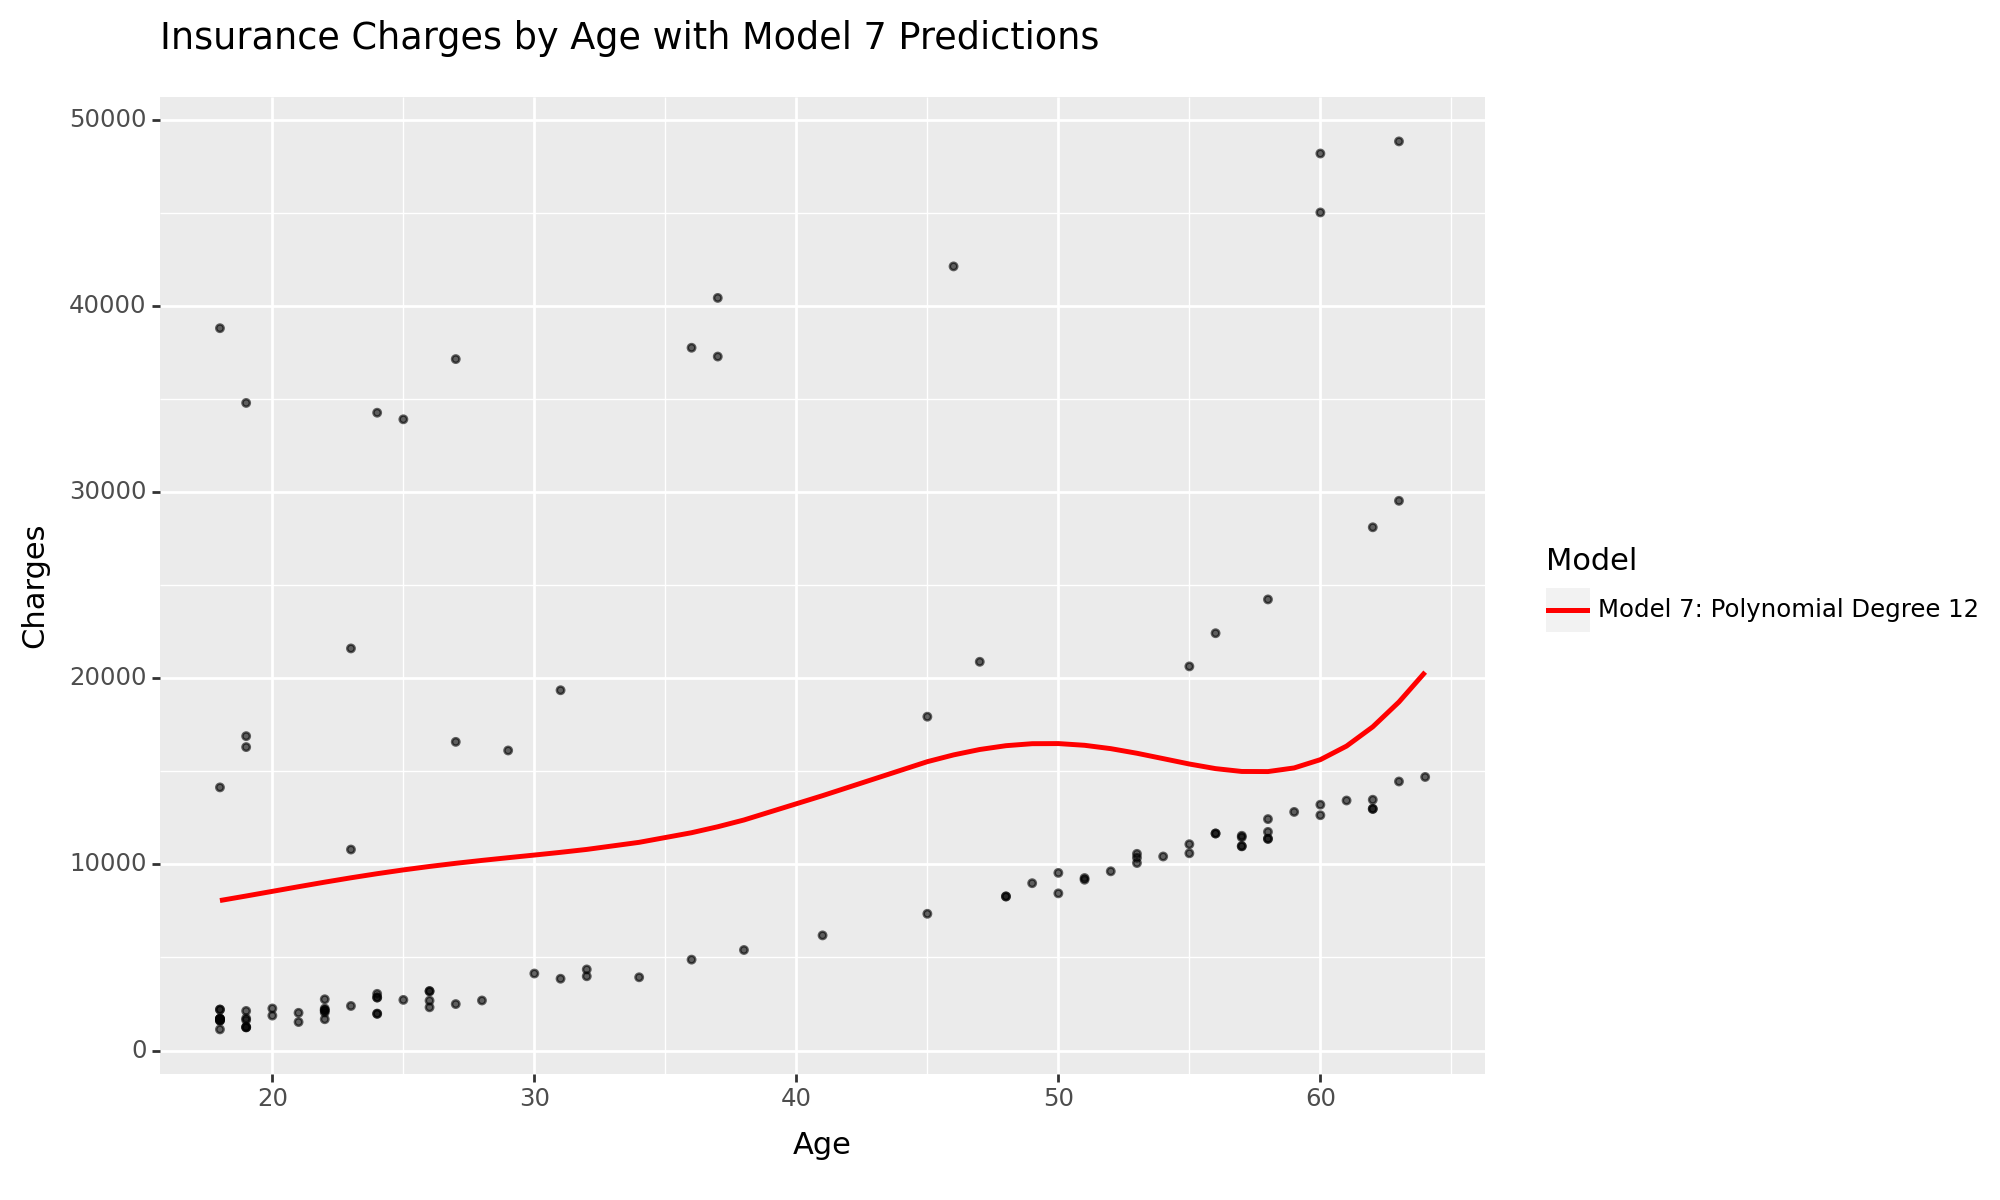

In [108]:
from plotnine import ggplot, geom_point, geom_line, aes, theme, labs, scale_color_manual

# Converting X_test to a dataframe and creating variables for predictions and original data
test_data_with_pred = X_test.copy()
test_data_with_pred['pred'] = y_pred7
test_data_with_pred['charges'] = y_test

# Plotting
plot = (
    ggplot(test_data_with_pred)
    + geom_point(aes(x='age', y='charges'), color='black', size=1, alpha=0.6, show_legend=False)
    + geom_line(aes(x='age', y='pred', color='"Model 7: Polynomial Degree 12"'), size=1)
    + scale_color_manual(values={'Model 7: Polynomial Degree 12': 'red'})
    + labs(x='Age', y='Charges', title="Insurance Charges by Age with Model 7 Predictions", color='Model')
    + theme(figure_size=(10, 6), legend_position='right')
)

print(plot)

# **Part Four: New data**

Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

Only age as a predictor.

age and bmi as a predictor.

age, bmi, and smoker as predictors (no interaction terms)

age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

*   For each model, fit the model on the original data.

*   Then, use the fitted model to predict on the new data.

*   Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

*   Make a plot showing the residuals of your final chosen model.

In [119]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [120]:
# Importing the new and original datasets
ins_costs_og = pd.read_csv('https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1')
ins_costs_new = pd.read_csv('https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1')

In [121]:
# Model 1: only age as a predictor
lr = LinearRegression()

# Setting the predictor and response variables
X_original_age = ins_costs_og[['age']]
y_original = ins_costs_og['charges']

# Fitting the model using only age as a predictor
lr.fit(X_original_age, y_original)

# Predicting with the new data
X_new_age = ins_costs_new[['age']]
y_new = ins_costs_new['charges']
predictions_age = lr.predict(X_new_age)

# Calculating MSE for the predictions
mse_age = mean_squared_error(y_new, predictions_age)
print(f'MSE for model with only age as a predictor: {mse_age:.2f}')

MSE for model with only age as a predictor: 136077136.50


In [122]:
# Model 2: age and bmi as a predictor
# Setting the predictor and response variables
X_original_age_bmi = ins_costs_og[['age', 'bmi']]
y_original = ins_costs_og['charges']

# Fitting the model using age and bmi as predictors
lr.fit(X_original_age_bmi, y_original)

# Predicting with the new data
X_new_age_bmi = ins_costs_new[['age', 'bmi']]
y_new = ins_costs_new['charges']
predictions_age_bmi = lr.predict(X_new_age_bmi)

# Calculating MSE for the predictions
mse_age_bmi = mean_squared_error(y_new, predictions_age_bmi)
print(f'MSE for model with age and bmi as predictors: {mse_age_bmi:.2f}')

MSE for model with age and bmi as predictors: 132636406.11


In [123]:
# Model 3: age, bmi, and smoker as predictors (no interaction terms)
# Create dummy variables for 'smoker'
ins_costs_og_dummies = pd.get_dummies(ins_costs_og, columns=['smoker'], drop_first=True)
ins_costs_new_dummies = pd.get_dummies(ins_costs_new, columns=['smoker'], drop_first=True)

# Setting the predictor and response variables
X_original_age_bmi_smoker = ins_costs_og_dummies[['age', 'bmi', 'smoker_yes']]
y_original = ins_costs_og_dummies['charges']

# Fitting the model using age, bmi, and smoker as predictors
lr.fit(X_original_age_bmi_smoker, y_original)

# Predicting with the new data
X_new_age_bmi_smoker = ins_costs_new_dummies[['age', 'bmi', 'smoker_yes']]
y_new = ins_costs_new_dummies['charges']
predictions_age_bmi_smoker = lr.predict(X_new_age_bmi_smoker)

# Calculating MSE for the predictions
mse_age_bmi_smoker = mean_squared_error(y_new, predictions_age_bmi_smoker)
print(f'MSE for model with age, bmi, and smoker as predictors: {mse_age_bmi_smoker:.2f}')

MSE for model with age, bmi, and smoker as predictors: 35377541.24


In [124]:
# Model 4: age, and bmi, with both quantitative variables having an interaction
# term with smoker (i.e. the formula ~ (age + bmi):smoker)

# Creating interaction terms
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_original_interact = interaction.fit_transform(ins_costs_og_dummies[['age', 'bmi', 'smoker_yes']])
X_new_interact = interaction.transform(ins_costs_new_dummies[['age', 'bmi', 'smoker_yes']])

# Fitting the model using the interaction terms
lr.fit(X_original_interact, y_original)

# Predicting with the new data using the interaction terms
predictions_interact = lr.predict(X_new_interact)

# Calculating MSE for the predictions
mse_interact = mean_squared_error(y_new, predictions_interact)
print(f'MSE for model with interaction terms: {mse_interact:.2f}')

MSE for model with interaction terms: 21785261.85


In [125]:
# Model 5: age, bmi, and smokeras predictors, with both quantitative variables
# having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

# Creating interaction terms for age and bmi with smoker
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_original_interact_full = interaction.fit_transform(ins_costs_og_dummies[['age', 'bmi', 'smoker_yes']])

# Removing duplicate effects that are already included in the interaction terms
X_original_full = np.hstack([ins_costs_og_dummies[['age', 'bmi']].values, X_original_interact_full[:, -2:]])

# Fitting the model using the interaction terms along with the main effects
lr.fit(X_original_full, y_original)

# Prepare the new data
X_new_interact_full = interaction.transform(ins_costs_new_dummies[['age', 'bmi', 'smoker_yes']])
X_new_full = np.hstack([ins_costs_new_dummies[['age', 'bmi']].values, X_new_interact_full[:, -2:]])

# Predicting with the new data using the interaction terms along with the main effects
predictions_full_interact = lr.predict(X_new_full)

# Calculating MSE for the predictions
mse_full_interact = mean_squared_error(y_new, predictions_full_interact)
print(f'MSE for model with full interaction terms: {mse_full_interact:.2f}')

MSE for model with full interaction terms: 24795908.41


In [115]:
# Reporting the MSE for each model's new predictions
# Creating a dictionary with model names and their MSE values
mse_values = {
    'Model': ['Age', 'Age + BMI', 'Age + BMI + Smoker', 'Age + BMI + Interaction', 'Age + BMI + Smoker + Full Interaction'],
    'MSE': [mse_age, mse_age_bmi, mse_age_bmi_smoker, mse_interact, mse_full_interact]
}

# Creating a dataframe
mse_table = pd.DataFrame(mse_values)

print(mse_table)

                                   Model           MSE
0                                    Age  1.360771e+08
1                              Age + BMI  1.326364e+08
2                     Age + BMI + Smoker  3.537754e+07
3                Age + BMI + Interaction  2.178526e+07
4  Age + BMI + Smoker + Full Interaction  2.479591e+07


In [150]:
# Finding the model with the lowest MSE
lowest_MSE = mse_table.loc[mse_table['MSE'].idxmin()]
print(f"The best model is {lowest_MSE['Model']} with an MSE of {lowest_MSE['MSE']:.2f}")

The best model is Age + BMI + Interaction with an MSE of 21785261.85


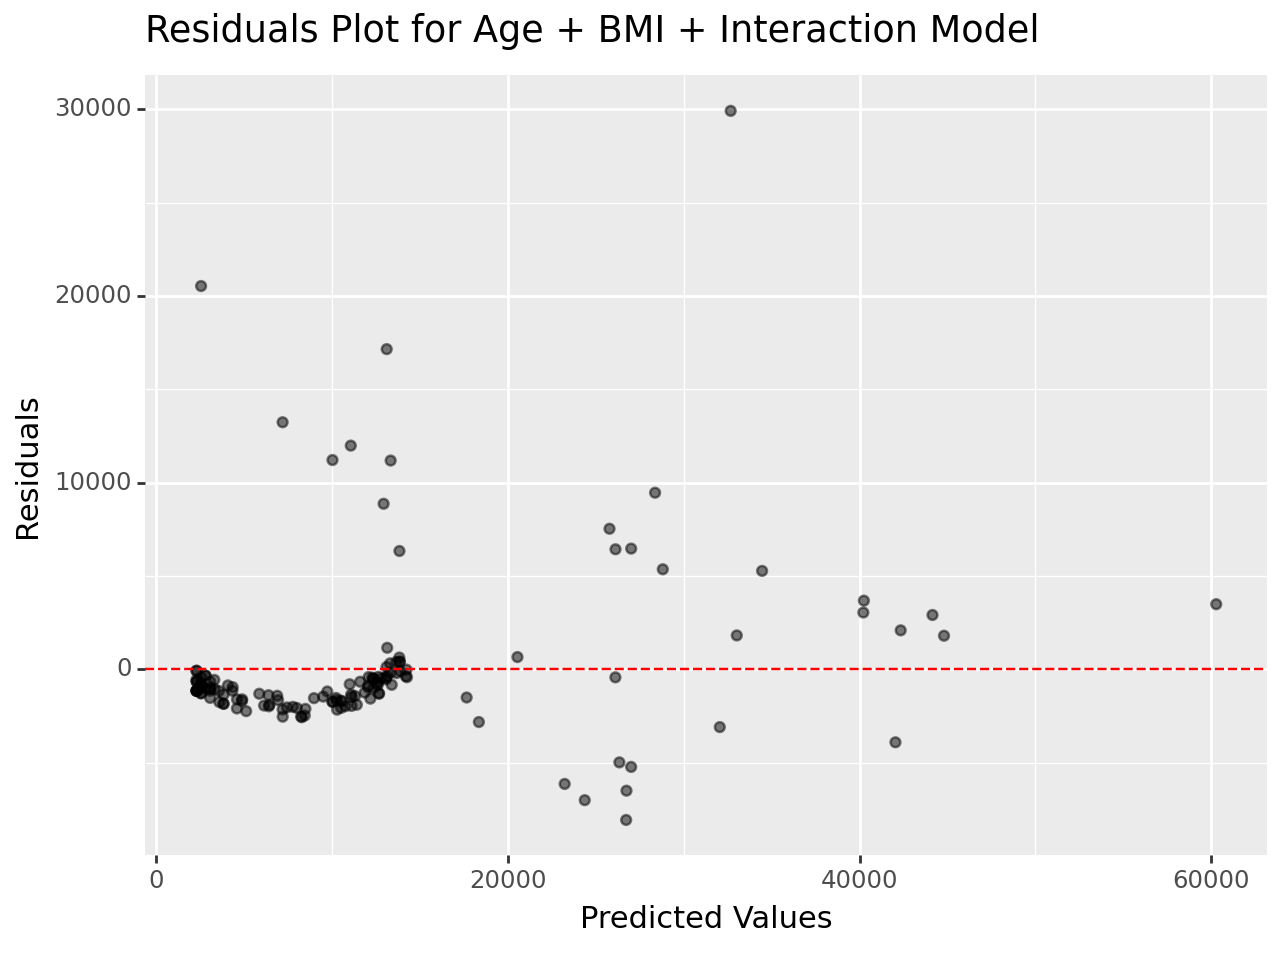

In [170]:
from plotnine import ggplot, aes, geom_point, geom_hline, labs

# Calculating the residuals
residuals_p4 = y_new - predictions_interact # from Model 4

# Creating a dataframe for plotting
plot_data = pd.DataFrame({
    'Predicted': predictions_interact,
    'Residuals': residuals_p4
})

# Plotting the residuals
residuals_plot_p4 = (
    ggplot(plot_data, aes(x='Predicted', y='Residuals')) +
    geom_point(alpha=0.5) +
    geom_hline(yintercept=0, color='red', linetype='dashed') +
    labs(x='Predicted Values', y='Residuals', title='Residuals Plot for Age + BMI + Interaction Model')
)

print(residuals_plot_p4)

Overall, the spread of values is random, with no patterns or funneling. There is some clumping near the lower end of predicted values, which could be caused by non-linearity between predictors and response variables, as the model is over-predicting for lower ranges of the predictor varaible. Also, heteroskedasticity could be present as the variance of residuals is not constant across all levels of the predictor variables. A transformation of the response variable may be necessary.

# **Part Five: Full Exploration**

Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

In [161]:
# Importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

In [162]:
# Importing the datasets
original_data = pd.read_csv('https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1')
new_data = pd.read_csv('https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1')

# Creating dummy variables for categorical variables
original_data_encoded = pd.get_dummies(original_data, drop_first=True)
new_data_encoded = pd.get_dummies(new_data, drop_first=True)

# Making sure both datasets have the same columns after encoding
new_data_encoded = new_data_encoded.reindex(columns=original_data_encoded.columns, fill_value=0)

# Separating predictors and response variables
X_original = original_data_encoded.drop('charges', axis=1)
y_original = original_data_encoded['charges']
X_new = new_data_encoded.drop('charges', axis=1)
y_new = new_data_encoded['charges']

# Identifying the numerical columns for scaling
numerical_columns = X_original.select_dtypes(include=['float64', 'int64']).columns

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the original data and scaling both original and new data
X_original_scaled = X_original.copy()
X_original_scaled[numerical_columns] = scaler.fit_transform(X_original[numerical_columns])

X_new_scaled = X_new.copy()
X_new_scaled[numerical_columns] = scaler.transform(X_new[numerical_columns])

# Initializing LassoCV to find the best alpha and fit the model
lasso = LassoCV(cv=5, random_state=42).fit(X_original_scaled, y_original)

# Getting the coefficients
coefs = pd.Series(lasso.coef_, index=X_original_scaled.columns)

# Displaying the coefficients
print(coefs[coefs != 0])

age                  3851.492939
bmi                  1650.007701
smoker_yes          23529.640824
region_southeast      -39.787644
dtype: float64


MSE on new data: 36014392.94
R2 on new data: 0.77



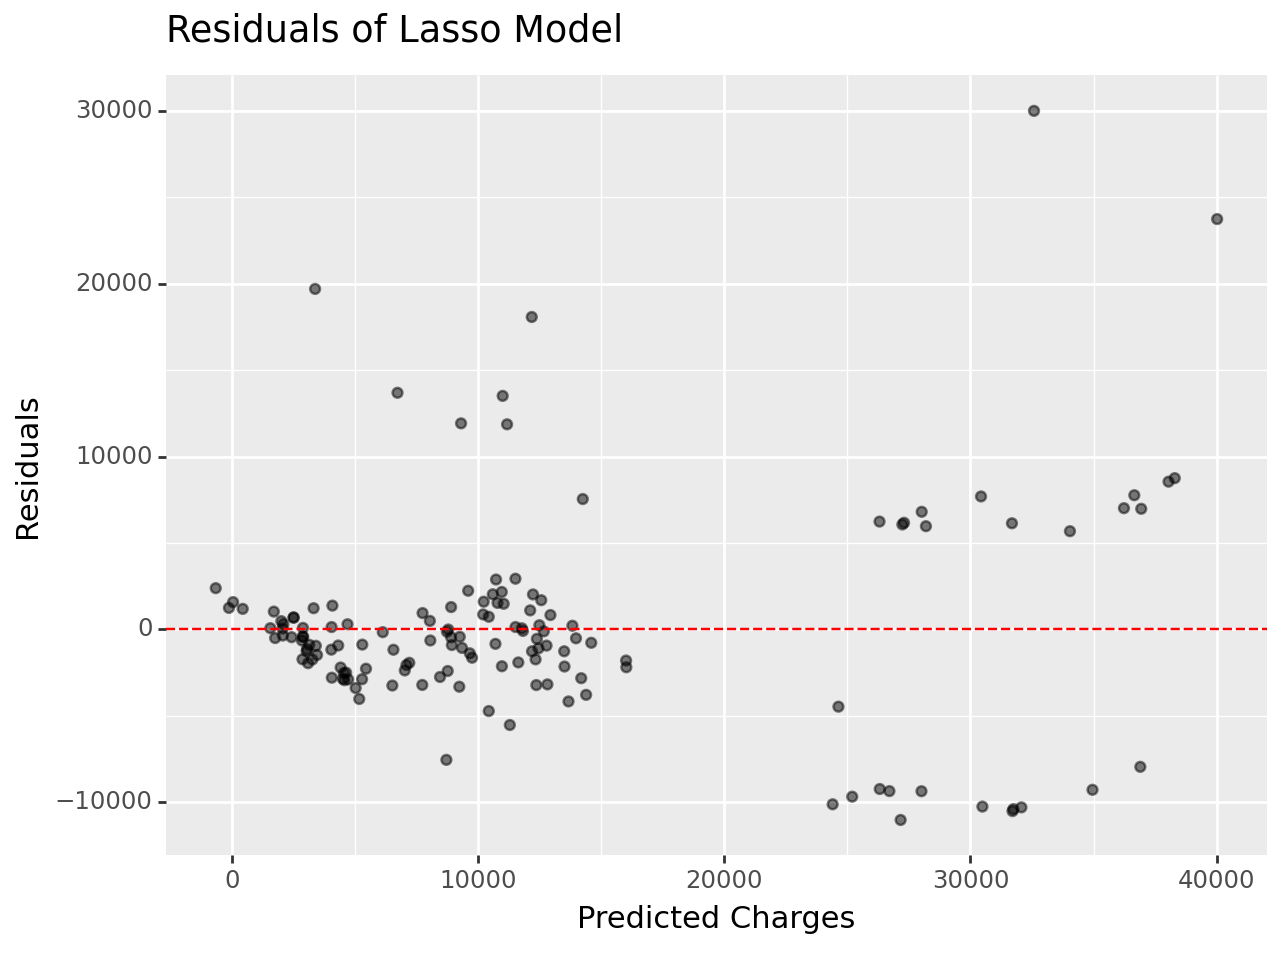

In [175]:
# Fitting the Lasso model
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_original_scaled, y_original)

# Predicting on the new scaled data using the Lasso model
y_new_pred = lasso.predict(X_new_scaled)

# Calculating MSE and R2 on the new data
mse_new_data = mean_squared_error(y_new, y_new_pred)
r2_new_data = lasso.score(X_new_scaled, y_new)

# Printing the MSE and R2 scores
print(f'MSE on new data: {mse_new_data:.2f}')
print(f'R2 on new data: {r2_new_data:.2f}')
print()

# Calculating the residuals on the new data
residuals_p5 = y_new - y_new_pred

# Plotting the residuals
residuals_plot_p5 = (
    ggplot(pd.DataFrame({'Residuals': residuals_p5, 'Predicted': y_new_pred}), aes(x='Predicted', y='Residuals'))
    + geom_point(alpha=0.5)
    + geom_hline(yintercept=0, color='red', linetype='dashed')
    + labs(title='Residuals of Lasso Model', x='Predicted Charges', y='Residuals')
)

print(residuals_plot_p5)

In [176]:
r2_interact = r2_score(y_new, predictions_interact)

print(f"R2 for Lasso Model: {r2_new_data:.2f} (Interaction Model R2: {r2_interact:.2f})")
print(f"Mean Squared Error for Lasso Model: {mse_new_data:.2f} (Interaction Model MSE: {mse_interact:.2f})")

R2 for Lasso Model: 0.77 (Interaction Model R2: 0.86)
Mean Squared Error for Lasso Model: 36014392.94 (Interaction Model MSE: 21785261.85)


When comparing the model fitted from the Lasso model with the best model from Part 4 with interactions, the MSE is higher at 36,014,392.94 (lasso) than 21785261.85 (interaction), and R2 explains less of the variability at 77% (Lasso) than 86% (interaction).